In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
df=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/BINÁRIO_HRV.csv')

In [3]:
df

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,0.03,87,35,1.660000,69.600000,25.257657,49.5922,4.0768,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,0.00,92,50,1.590000,98.700000,39.041177,48.4985,6.3788,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,0.00,92,27,1.800000,91.000000,28.086420,51.0391,14.4829,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,0.07,88,26,1.649234,59.700000,21.948760,47.7805,1.4780,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,APNEICO,117.50,34.30,69,63,1.620000,89.500000,34.103033,54.1595,13.1081,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,APNEICO,72.00,68.40,67,64,1.640000,127.000000,47.218917,64.2736,1.0004,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,APNEICO,33.80,1.80,82,51,1.650000,94.200000,34.600551,48.8423,9.6049,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,APNEICO,34.30,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [4]:
#separando conjunto de teste e de treino
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
train_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,APNEICO,36.3,23.6,75,67,1.61,76.0,29.319856,75.0727,4.2549,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,NORMAL,14.4,14.4,81,51,1.52,48.0,20.775623,69.9003,1.7170,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,APNEICO,49.2,10.8,77,70,1.64,69.0,25.654372,50.9938,12.7780,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,NORMAL,5.0,0.2,87,36,1.69,74.0,25.909457,54.0109,3.0068,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,NORMAL,14.9,1.4,83,27,1.55,70.0,29.136316,50.3281,5.6408,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0


In [6]:
test_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
84,NORMAL,6.3,0.0,90,42,1.610000,108.000000,41.665059,54.4808,6.0207,...,-6.1145,6.4501,51.3422,52.2414,0.4297,27.6741,59.3422,12.9837,1.0,0.0
259,APNEICO,55.5,2.4,85,54,1.560000,77.300000,31.763642,59.7655,5.2408,...,-6.0373,6.1587,50.8726,51.4137,0.4595,23.5269,56.0213,20.4518,1.0,0.0
45,NORMAL,2.2,2.0,82,53,1.640000,65.000000,24.167162,58.2716,5.4463,...,-7.5442,7.9502,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527,1.0,0.0
176,APNEICO,26.6,9.2,70,65,1.650000,122.000000,44.811754,59.9173,1.7589,...,-9.5779,6.8927,48.0135,48.4821,-0.1614,9.4193,68.5894,21.9913,1.0,0.0
143,APNEICO,19.3,0.0,91,66,1.649234,89.262007,32.817260,47.7825,24.3318,...,-7.1254,10.2476,57.5344,61.9283,3.2136,44.2501,35.7581,19.9918,0.0,1.0


In [7]:
y_T = train_set['CLASSE'].copy()
X_T = train_set.iloc[:, 2:].copy()
y_T.value_counts()

CLASSE
APNEICO    129
NORMAL      74
Name: count, dtype: int64

In [8]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,23.60,75,67,1.61,76.0,29.319856,75.0727,4.2549,11.3053,39.4062,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,14.40,81,51,1.52,48.0,20.775623,69.9003,1.7170,10.4227,64.2845,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,10.80,77,70,1.64,69.0,25.654372,50.9938,12.7780,34.7683,39.3050,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,0.20,87,36,1.69,74.0,25.909457,54.0109,3.0068,41.3305,46.3030,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,1.40,83,27,1.55,70.0,29.136316,50.3281,5.6408,50.0402,32.0461,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,18.39,49,32,1.60,123.7,48.320312,52.5720,8.5143,39.1033,38.5719,...,-9.0357,8.4255,48.2910,49.9403,-0.0504,25.6497,54.3417,20.0087,1.0,0.0
71,18.70,73,56,1.56,85.0,34.927679,61.2185,3.0387,20.9251,65.3840,...,-11.6971,11.4989,49.8138,51.2127,0.4347,9.1912,67.6111,23.1977,1.0,0.0
106,0.70,79,47,1.48,70.0,31.957633,58.2807,2.5312,33.7759,50.0790,...,-7.9992,7.7740,52.0880,53.6257,0.7734,13.8376,66.4834,19.6790,1.0,0.0
270,99.70,53,40,1.85,188.0,54.930606,61.2457,4.1517,27.5211,48.8306,...,-5.0520,5.8209,52.2840,52.9548,0.4492,16.9553,61.9908,21.0539,0.0,1.0


In [9]:
from sklearn.experimental import enable_iterative_imputer

In [10]:
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE()
from sklearn.impute import IterativeImputer as imputer
X_T, y_T = smote.fit_resample(train_set.iloc[:, 2:], train_set['CLASSE'],)
from collections import Counter
print(y_T.value_counts())

CLASSE
APNEICO    129
NORMAL     129
Name: count, dtype: int64


In [11]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,23.600000,75,67,1.610000,76.000000,29.319856,75.072700,4.254900,11.305300,39.406200,...,-1.228900,1.369900,51.004300,51.327700,0.212600,23.946100,42.715100,33.338800,1.000000,0.000000
1,14.400000,81,51,1.520000,48.000000,20.775623,69.900300,1.717000,10.422700,64.284500,...,-7.113700,6.527800,47.496100,46.778100,-0.556200,5.565900,56.157100,38.277100,1.000000,0.000000
2,10.800000,77,70,1.640000,69.000000,25.654372,50.993800,12.778000,34.768300,39.305000,...,-9.684400,9.935000,51.195300,50.864300,0.193000,31.921100,52.456600,15.622300,0.000000,1.000000
3,0.200000,87,36,1.690000,74.000000,25.909457,54.010900,3.006800,41.330500,46.303000,...,-11.948500,10.700500,48.570000,51.089800,0.232800,16.240000,69.813600,13.946500,0.000000,1.000000
4,1.400000,83,27,1.550000,70.000000,29.136316,50.328100,5.640800,50.040200,32.046100,...,-6.234200,8.984000,51.345900,52.477600,0.441700,29.356400,58.449400,12.194200,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.000000,89,41,1.562594,63.057652,25.829563,53.286615,4.824191,42.715167,40.221761,...,-8.166972,7.257406,46.536963,46.500898,-0.538050,24.282565,62.189726,13.527707,0.971174,0.028826
254,4.622547,62,48,1.859231,102.804269,29.697693,57.046430,3.997053,37.301687,42.229624,...,-5.462186,4.860763,48.433600,48.099843,-0.293203,17.386234,59.481971,23.131796,0.000000,1.000000
255,39.619373,84,65,1.563778,69.344564,28.343842,67.418506,2.050988,13.397552,64.857024,...,-6.265456,6.281270,50.036688,49.987869,-0.007958,7.060508,60.389816,32.549677,0.377788,0.622212
256,6.582909,85,40,1.606857,59.942778,22.961132,61.958515,4.325303,24.656103,51.866399,...,-6.989549,6.862198,49.437181,49.726663,0.063739,15.823498,57.271795,26.904698,1.000000,0.000000


In [12]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_T,y_T)

RandomForestClassifier(random_state=7)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_t = test_set['CLASSE'].copy()
X_t = test_set.iloc[:, 2:].copy()
print(y_t.value_counts())

predict=RF.predict(X_t)
accuracy_score(predict,y_t)

CLASSE
APNEICO    52
NORMAL     36
Name: count, dtype: int64


0.7727272727272727

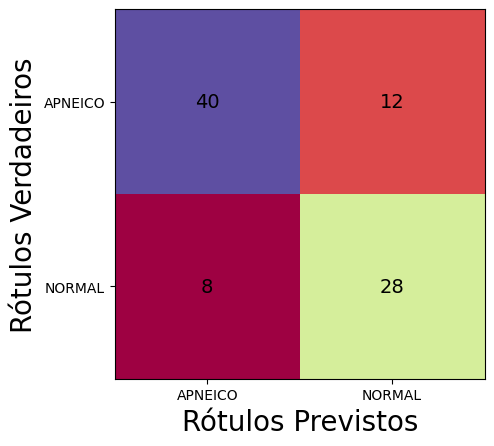

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_t)
conf_matrix = confusion_matrix(y_t, predict, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

## Implementando o Algoritmo Genético

In [15]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
colunas_features = train_set.drop(columns=['CLASSE', 'IAH']).columns
individuos_iniciais = train_set[colunas_features].values.tolist()
classes_iniciais = train_set['CLASSE'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [17]:
colunas_features

Index(['T90', 'SATMIN', 'IDADE', 'ALTURA', 'PESO', 'IMC', 'PIP', 'W0', 'W1',
       'W2', 'W3', 'SYMB0V', 'SYMB1V', 'SYMB2LV', 'SYMB2UV', 'VLFABS', 'LFABS',
       'HFABS', 'LFNU', 'HFNU', 'LFHF', 'MEANRR', 'SDNN', 'RMSSD', 'DFA ',
       'SAMPEN', 'FUZZYEN', 'DISTEN', 'PERMEN', 'DISPEN', 'ATTEN', 'PHASEEN',
       'AC', 'DC', 'PORTAS', 'GUZIKS', 'EHLERS', 'BIN0V', 'BIN1V', 'BIN2V',
       'F', 'M'],
      dtype='object')

In [18]:
continuous = colunas_features
discrete=[]
class_name = 'CLASSE'
idx_features = colunas_features

min_vals = train_set[continuous].min().values
max_vals = train_set[continuous].max().values
print(min_vals, max_vals)

[ 0.00000000e+00  3.40000000e+01  1.90000000e+01  1.32000000e+00
  3.70000000e+01  1.64444444e+01  3.93232000e+01  3.78900000e-01
  6.32190000e+00  2.20120000e+01  1.25600000e+00  4.07400000e+00
  2.33674000e+01  8.04000000e-02  4.66840000e+00  4.90000000e+00
  5.29700000e-01  9.27900000e-01  9.58510000e+00  1.54330000e+00
  1.22700000e-01  5.74849700e+02  6.83360000e+00  2.15650000e+00
  3.56000000e-01  8.42900000e-01  6.87600000e-01  3.88400000e-01
  2.25900000e+00  3.14000000e+00  1.20500000e+00  6.92400000e-01
 -4.74267000e+01 -3.44520000e+00  4.24109000e+01  3.38057000e+01
 -2.38730000e+00  3.49760000e+00  3.26297000e+01  4.31130000e+00
  0.00000000e+00  0.00000000e+00] [ 1.00000000e+02  9.30000000e+01  8.00000000e+01  1.95000000e+00
  2.09000000e+02  7.40504535e+01  7.70383000e+01  1.89070000e+01
  6.98753000e+01  7.06150000e+01  4.50336000e+01  7.12194000e+01
  5.67064000e+01  3.28523000e+01  4.84680000e+01  1.26941832e+04
  4.58612150e+03  1.33676168e+04  9.84567000e+01  9.0414

In [19]:
idx_features.shape

(42,)

In [20]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [152]:
# x_referência=individuos_iniciais[0]
# x_teste=individuos_iniciais[:1] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d)
# print(x0d)

In [22]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

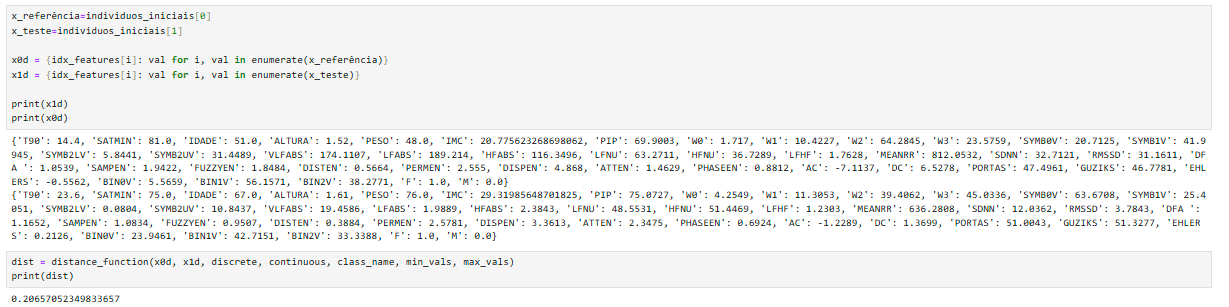

In [23]:
idx=5
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

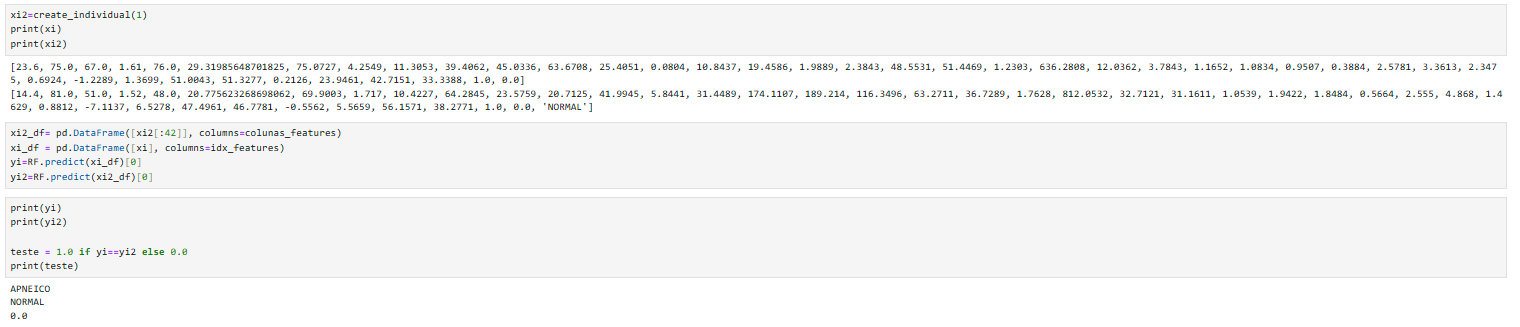

In [24]:
#Função de fitness: similar_same_outcome
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    #Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita warning)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    #Similaridade de saída
    target_similarity = 1.0 if y0 == y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,

#Função de fitness: similar_different_outcome
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    #Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    #Previsão com DataFrame nomeado (evita o aviso de que as previsõe dentro do AG são feitas sem as labels)
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)
    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]

    # Similaridade de saída invertida
    target_similarity = 1.0 if y0 != y1 else 0.0

    # Avaliação final
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
    return evaluation,

In [25]:
# # Função de fitness 
# def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
#     # similar_same_outcome
#     x0d = {idx_features[i]: val for i, val in enumerate(x0)}
#     x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
#     # zero if is too similar
#     sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
#     record_similarity = 0.0 if sim_ratio >= eta else sim_ratio
    
#     y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
#     y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
#     target_similarity = 1.0 if y0 == y1 else 0.0
    
#     evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
#     return evaluation,
   
# def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
#     # similar_different_outcome
#     x0d = {idx_features[i]: val for i, val in enumerate(x0)}
#     x1d = {idx_features[i]: val for i, val in enumerate(x1)}

#     # zero if is too similar
#     sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
#     record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

#     y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
#     y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
#     target_similarity = 1.0 if y0 != y1 else 0.0  

#     evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * target_similarity
#     return evaluation,

In [26]:
#Reprodução, crossover do tipo aritmético
def Crossover_func(ind1, ind2, alpha=0.5, cx_prob=0.5):
    if random.random() < 1:
        for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
            gamma = (1. + 2. * alpha) * random.random() - alpha
            ind1[i] = (1. - gamma) * x1 + gamma * x2
            ind2[i] = gamma * x1 + (1. - gamma) * x2
        
        # Manter a classe original dos indivíduos sem alterar
        ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
        ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
        
        return ind1, ind2
    else:
        return ind1, ind2

In [27]:
# ind1 = [10, 20, 30, 40]
# ind2 = [1, 2, 3, 4]
# zip(ind1[:-1], ind2[:-1]) → [(10, 1), (20, 2), (30, 3)]

# list(enumerate(zip(ind1[:-1], ind2[:-1]))) →
# [
#   (0, (10, 1)),
#   (1, (20, 2)),
#   (2, (30, 3))
# ]

In [28]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [29]:
# print('individuo 1', ind1_test, end='\n\n')
# print('individuo 2', ind2_test, end='\n\n')
# cxpb=0.9
# ind1_cros, ind2_cros = Crossover_func(ind1_test, ind2_test,alpha=0.5)
# print('individuo 1 crossover', ind1_cros, end='\n\n')
# print('individuo 2 crossover', ind2_cros)

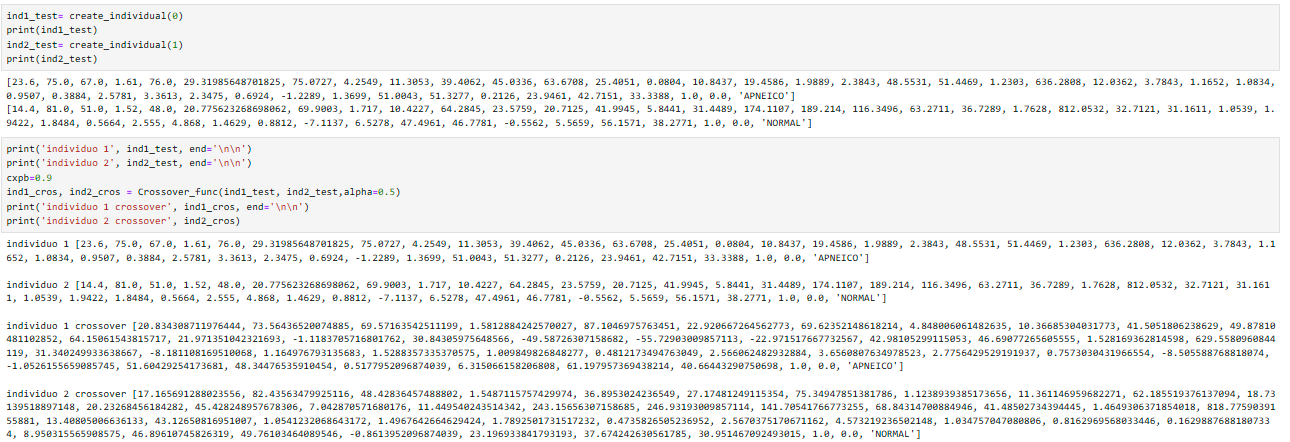

In [30]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão
def mutGaussianWithoutClass(individual, mu, sigma, mutpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < 1:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [31]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [32]:
# ind1_mut=mutGaussianWithoutClass(ind1_test[:-1], 0, 1, 0.8, min_vals=min_vals, max_vals=max_vals)
# print(ind1_mut)

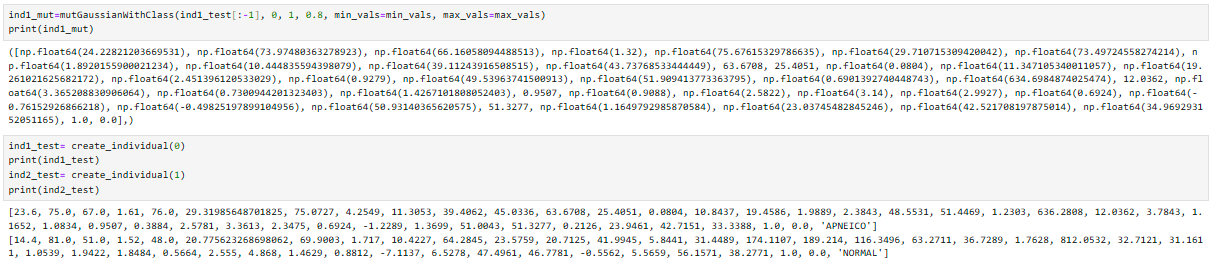

In [177]:
#Criando indivíduos que estão próximos e resultam numa mesma classe SSO
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 1
    alpha2 = 1
    eta = 0.9
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.5  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Melhor indivíduo: [np.float64(0.6738653709643335), np.float64(90.84709630454353), np.float64(47.77412731741061), np.float64(1.32), np.float64(95.51557714380975), np.float64(31.1355835156834), np.float64(54.61634975790072), np.float64(10.69536011951709), np.float64(34.88100015881333), np.float64(42.765705888680344), np.float64(13.272295186696974), np.float64(52.63565027306934), np.float64(35.90508146252817), np.float64(0.3012349926771849), np.float64(4.6684), np.float64(456.23722509064174), np.float64(142.17568566807594), np.float64(42.17937786904252), np.float64(75.62844660552948), np.float64(26.701878529334476), np.float64(5.121170165550489), np.float64(939.4802233477426), np.float64(39.48441512580532), np.float64(12.413161508187889), np.float64(0.356), np.float64(1.8723319989770053), np.float64(0.6876), np.float64(0.5126704801734113), np.float64(2.5822), np.float64(3.14), np.float64(2.531944232672133), np.float64(0.7932328613392615), np.float64(-3.673800130532907), np.float64(5.73678

In [178]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente SDO
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.5
    alpha2 = 1
    eta = 0.9
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes= [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Melhor indivíduo: [np.float64(3.661445110777695), np.float64(90.98464476597283), np.float64(48.040189336540045), np.float64(1.8329919657472458), np.float64(97.697073460499), np.float64(23.519223361014827), np.float64(54.55018326835541), np.float64(12.513937213031118), np.float64(33.74598097635194), np.float64(43.03203555251394), np.float64(13.578002548120336), np.float64(53.87359478354487), np.float64(36.89014708582301), np.float64(4.020328144737636), np.float64(4.735333961970772), np.float64(455.9676397789675), np.float64(142.45251175509392), np.float64(36.99907554521391), np.float64(76.44668971029067), np.float64(24.294744079801124), np.float64(1.383123159998205), np.float64(941.2538644764888), np.float64(39.48496180121542), np.float64(13.214006253529675), np.float64(1.490147737489084), np.float64(0.8501230785275391), np.float64(0.30842113809026217), np.float64(0.7237701667431209), np.float64(2.480210798575073), np.float64(3.11437484821682), np.float64(2.6562762277043115), np.float64

In [191]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
SSO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.189312,88.189120,47.009303,1.32000,96.043939,30.796591,53.572664,4.294802,32.713316,43.767194,...,-6.716731,2.136031,53.386342,52.431520,-0.278981,29.727536,56.537514,19.813137,0.0,0.0000
1,1.000703,89.418946,47.517133,1.32000,98.561655,29.936684,55.783995,8.901962,31.811941,42.660212,...,-3.683230,2.721484,47.585261,53.462712,2.963785,24.377326,55.940410,15.775342,1.0,1.0000
2,2.797325,88.238159,46.833796,1.95000,98.263564,23.498583,54.675649,3.465541,35.528829,44.686812,...,-5.098191,3.855567,50.418552,48.134094,2.300999,24.519046,50.855201,20.183671,0.0,1.0000
3,0.231651,87.802966,48.580090,1.71695,93.200288,33.702213,53.189206,7.605849,30.710881,44.337074,...,-6.536853,2.596580,52.268403,51.318956,0.437749,28.566344,55.255915,16.692171,0.0,0.4475
4,2.478649,90.382780,49.614768,1.92261,99.226300,31.997341,54.387041,10.349050,33.189632,41.441229,...,-5.315364,3.845071,52.261730,50.401104,-0.783844,27.624120,54.687422,19.399508,0.0,0.0095


In [192]:
SDO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.749057,88.600776,47.243264,1.276781,99.795981,31.516919,57.801834,7.641269,30.076337,47.742315,...,-4.880929,4.039706,50.354797,51.394123,0.737747,31.241658,53.613814,17.418358,0.563227,0.939038
1,3.215133,92.893385,47.798511,1.993219,99.720513,27.530122,44.835703,8.756759,31.556494,41.629716,...,-5.761003,5.118585,50.104456,52.192854,2.811643,21.306316,54.526262,17.909293,0.436773,0.999314
2,3.852341,86.607309,49.223150,1.320000,99.370994,26.729062,53.267339,7.289918,34.937066,44.177401,...,-6.117877,3.503340,49.786692,47.485519,2.809504,27.817736,57.612116,20.635106,1.000000,0.124364
3,2.895947,83.209117,49.566534,1.876536,100.535038,31.581068,56.409819,11.376048,34.163681,42.440456,...,-5.382914,3.901300,52.210708,50.165454,-3.062984,25.632786,54.904071,12.630384,0.654236,0.383974
4,0.000000,84.585896,48.120002,1.320000,99.997923,30.889168,51.441855,7.487718,33.089453,41.210111,...,-3.357775,7.192887,49.272632,51.339583,-2.387300,28.652640,55.895449,18.889074,0.079482,0.224585


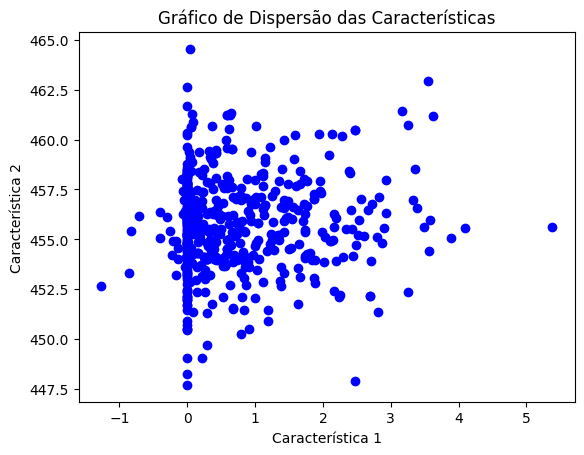

In [193]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[15], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

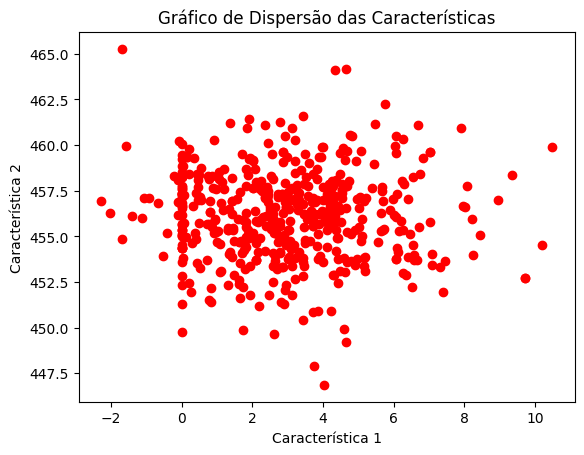

In [194]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[15], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [195]:
#Realmente os dados foram criados em torno de xi, mas os dados SDO estão muito parecidos com os SSO e estão sendo classificados como APNÉICO
#ARRUMEI A MUTAÇÃO E O CROSSOVER, ALGUNS DADOS DO SDO SÃO CLASSIFICADOS NA CLASSE OPOSTA MAS AINDA NÃO É SUFICIENTE, TALVEZ AUMENTAR O VALOR QUE É ADICIONADO AO VALOR
#TALVEZ A SAÍDA SEJA IMPLEMENTAR DDO E DSO PARA GERAR OS DADOS DA CLASSE OPOSTA

In [196]:
print(xi)

[0.1, 89.0, 48.0, 1.83, 99.0, 29.56194571351787, 55.0404, 7.8663, 34.2416, 42.7749, 15.1172, 55.2466, 36.39, 1.5441, 6.8193, 455.5005, 140.9598, 41.6113, 74.8181, 25.1819, 3.3932, 940.8828, 41.1181, 12.6073, 1.5935, 1.5317, 1.0143, 0.5895, 2.4482, 3.6933, 2.4551, 0.9129, -6.2592, 4.5254, 50.209, 51.9575, 0.9313, 27.1667, 54.967, 17.8663, 0.0, 1.0]


In [197]:
XSSO=SSO.iloc[:, :42].values
XSDO=SDO.iloc[:, :42].values

In [198]:
XTOTAL = pd.concat([SSO, SDO], ignore_index=True)
XTOTAL.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.189312,88.189120,47.009303,1.32000,96.043939,30.796591,53.572664,4.294802,32.713316,43.767194,...,-6.716731,2.136031,53.386342,52.431520,-0.278981,29.727536,56.537514,19.813137,0.0,0.0000
1,1.000703,89.418946,47.517133,1.32000,98.561655,29.936684,55.783995,8.901962,31.811941,42.660212,...,-3.683230,2.721484,47.585261,53.462712,2.963785,24.377326,55.940410,15.775342,1.0,1.0000
2,2.797325,88.238159,46.833796,1.95000,98.263564,23.498583,54.675649,3.465541,35.528829,44.686812,...,-5.098191,3.855567,50.418552,48.134094,2.300999,24.519046,50.855201,20.183671,0.0,1.0000
3,0.231651,87.802966,48.580090,1.71695,93.200288,33.702213,53.189206,7.605849,30.710881,44.337074,...,-6.536853,2.596580,52.268403,51.318956,0.437749,28.566344,55.255915,16.692171,0.0,0.4475
4,2.478649,90.382780,49.614768,1.92261,99.226300,31.997341,54.387041,10.349050,33.189632,41.441229,...,-5.315364,3.845071,52.261730,50.401104,-0.783844,27.624120,54.687422,19.399508,0.0,0.0095


In [199]:
print("XTOTAL shape:", XTOTAL.shape)
print("df.columns[2:] length:", len(df.columns[2:]))

XTOTAL shape: (1000, 42)
df.columns[2:] length: 42


In [200]:
XTOTAL_df = pd.DataFrame(XTOTAL.to_numpy(), columns=df.columns[2:])
XTOTAL_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,1.189312,88.189120,47.009303,1.32000,96.043939,30.796591,53.572664,4.294802,32.713316,43.767194,...,-6.716731,2.136031,53.386342,52.431520,-0.278981,29.727536,56.537514,19.813137,0.000000,0.000000
1,1.000703,89.418946,47.517133,1.32000,98.561655,29.936684,55.783995,8.901962,31.811941,42.660212,...,-3.683230,2.721484,47.585261,53.462712,2.963785,24.377326,55.940410,15.775342,1.000000,1.000000
2,2.797325,88.238159,46.833796,1.95000,98.263564,23.498583,54.675649,3.465541,35.528829,44.686812,...,-5.098191,3.855567,50.418552,48.134094,2.300999,24.519046,50.855201,20.183671,0.000000,1.000000
3,0.231651,87.802966,48.580090,1.71695,93.200288,33.702213,53.189206,7.605849,30.710881,44.337074,...,-6.536853,2.596580,52.268403,51.318956,0.437749,28.566344,55.255915,16.692171,0.000000,0.447500
4,2.478649,90.382780,49.614768,1.92261,99.226300,31.997341,54.387041,10.349050,33.189632,41.441229,...,-5.315364,3.845071,52.261730,50.401104,-0.783844,27.624120,54.687422,19.399508,0.000000,0.009500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.129857,92.804419,50.018257,1.32000,98.041490,28.307491,51.606410,6.555123,32.454784,42.194057,...,-1.127403,0.802763,47.484770,52.377494,2.271861,34.779197,56.211601,17.502942,0.039229,1.000000
996,4.602487,85.490781,52.103391,1.95000,99.894996,31.209289,52.978389,6.183627,32.942252,41.170783,...,-6.386273,6.472051,55.816606,52.337367,2.611508,28.777100,55.665349,16.183283,0.097230,0.375790
997,0.000000,89.818559,48.518537,1.95000,98.274807,30.881790,59.001336,13.228030,33.592598,43.255757,...,-6.389133,4.698492,55.124178,51.507818,-0.285696,28.394683,56.835252,17.769156,0.247421,1.000000
998,2.925805,89.902693,48.994576,1.32000,103.467046,30.905712,53.994207,7.458330,35.724235,42.472347,...,-5.032633,4.350727,49.035562,50.023052,3.102020,22.205011,53.978843,17.978077,0.194408,0.924373


In [201]:
#Ainda tem alguma coisa errada, ele esta prevendo todos como APNEICO

In [202]:
ytotal= RF.predict(XTOTAL_df)
pd.Series(ytotal).value_counts()

NORMAL     507
APNEICO    493
Name: count, dtype: int64

In [203]:
import pandas as pd
y_series = pd.Series(ytotal, name="label")
dfb= XTOTAL_df.copy()
dfb["label"] = y_series

# Descobre o tamanho da menor classe
min_count = y_series.value_counts().min()

# Balanceia o conjunto
balanced_df = dfb.groupby("label").sample(n=min_count, random_state=42)
print(balanced_df)

# Separa novamente X e y
Xb = balanced_df.drop(columns="label")
yb = balanced_df["label"] 

           T90     SATMIN      IDADE    ALTURA        PESO        IMC  \
952   0.000000  90.388333  49.336771  1.320000   98.396756  31.351452   
505   1.692935  89.684748  48.534062  1.761515   99.788666  29.616969   
790  10.491703  88.598470  41.473124  1.465454  105.769987  30.632188   
628   2.597234  85.733563  49.038446  1.584325   97.210854  27.292399   
816   2.515673  88.286227  49.183702  1.320000   96.287829  30.798472   
..         ...        ...        ...       ...         ...        ...   
458   0.000000  88.902441  50.052864  1.677334   99.521679  25.202419   
182   0.945686  91.666920  45.839071  1.940147   99.661427  27.412417   
399   0.085490  89.619980  48.954134  1.956758   99.186254  27.015300   
751   0.000000  88.787582  48.951326  1.710320   97.701931  30.786651   
192   2.130633  88.176536  49.719073  1.950000   90.511209  27.983881   

           PIP         W0         W1         W2  ...        DC     PORTAS  \
952  52.373120   8.762746  37.347663  42.77255

In [204]:
yb.value_counts()

label
APNEICO    493
NORMAL     493
Name: count, dtype: int64

In [208]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(Xb, yb)

DecisionTreeClassifier(max_depth=15, random_state=42)

## Implementando a Árvore de Decisão

In [209]:
import numpy as np
xi = np.array(xi).reshape(1, -1)
print(xi)

[[ 1.00000000e-01  8.90000000e+01  4.80000000e+01  1.83000000e+00
   9.90000000e+01  2.95619457e+01  5.50404000e+01  7.86630000e+00
   3.42416000e+01  4.27749000e+01  1.51172000e+01  5.52466000e+01
   3.63900000e+01  1.54410000e+00  6.81930000e+00  4.55500500e+02
   1.40959800e+02  4.16113000e+01  7.48181000e+01  2.51819000e+01
   3.39320000e+00  9.40882800e+02  4.11181000e+01  1.26073000e+01
   1.59350000e+00  1.53170000e+00  1.01430000e+00  5.89500000e-01
   2.44820000e+00  3.69330000e+00  2.45510000e+00  9.12900000e-01
  -6.25920000e+00  4.52540000e+00  5.02090000e+01  5.19575000e+01
   9.31300000e-01  2.71667000e+01  5.49670000e+01  1.78663000e+01
   0.00000000e+00  1.00000000e+00]]


In [210]:
Explicando=ClassificadorDT.predict(xi)
print(Explicando)

['NORMAL']


C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


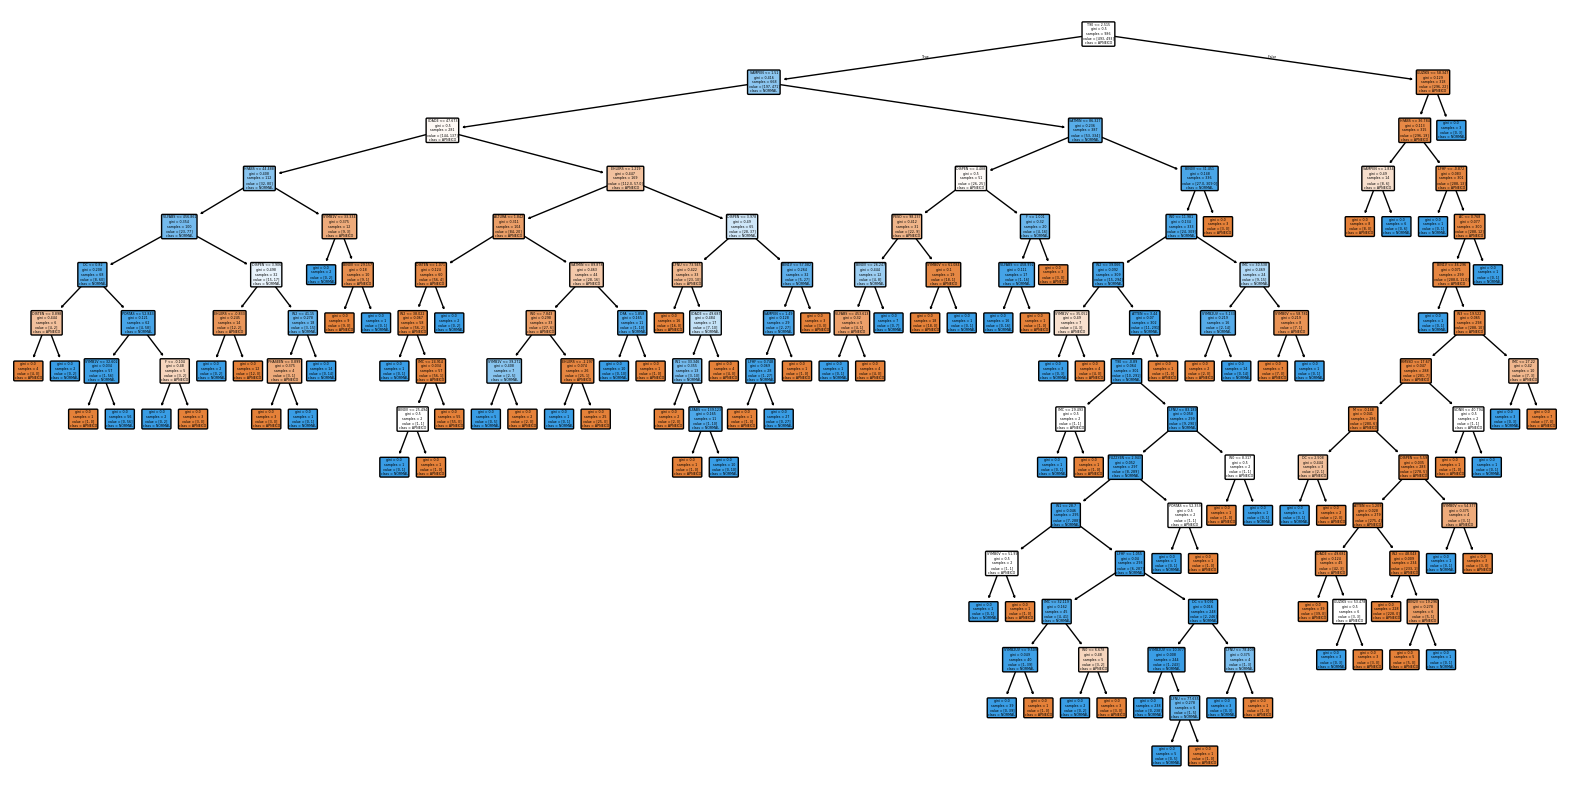

In [211]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(ClassificadorDT, filled=True, feature_names=colunas_features, class_names=classes_iniciais, rounded=True)
plt.savefig("arvore_decisao.png", dpi=300, bbox_inches='tight')  # salva como PNG com boa resolução
plt.show()

In [212]:
node_indicator = ClassificadorDT.decision_path(xi)
node_index = node_indicator.indices
print("Nós percorridos para essa amostra:", node_indicator)

thresholds = ClassificadorDT.tree_.threshold
features = ClassificadorDT.tree_.feature
children_left = ClassificadorDT.tree_.children_left
children_right = ClassificadorDT.tree_.children_right

for node in node_index:
    feature_index = features[node]  # índice da característica usada no nó
    threshold = thresholds[node]    # valor de corte
    value = xi[0][feature_index]    # Garantindo que 'value' seja um escalar

    # Verifica se o nó é uma folha
    if children_left[node] == -1 and children_right[node] == -1:
        print(f"A amostra {xi} chegou a uma folha no nó {node}.")

        print(f"A classe final da amostra é: {classes_iniciais[idx]}") 
    else:
        if value <= threshold:
            print(f"O exemplo {xi} satisfaz a condição: {xi[0][feature_index]} <= {threshold} no nó {node}")
        else:
            print(f"O exemplo {xi} NÃO satisfaz a condição: {xi[0][feature_index]} > {threshold} no nó {node}")

Nós percorridos para essa amostra: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15 stored elements and shape (1, 173)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 69)	1
  (0, 85)	1
  (0, 86)	1
  (0, 87)	1
  (0, 91)	1
  (0, 92)	1
  (0, 96)	1
  (0, 97)	1
  (0, 98)	1
  (0, 102)	1
  (0, 110)	1
  (0, 111)	1
  (0, 112)	1
O exemplo [[ 1.00000000e-01  8.90000000e+01  4.80000000e+01  1.83000000e+00
   9.90000000e+01  2.95619457e+01  5.50404000e+01  7.86630000e+00
   3.42416000e+01  4.27749000e+01  1.51172000e+01  5.52466000e+01
   3.63900000e+01  1.54410000e+00  6.81930000e+00  4.55500500e+02
   1.40959800e+02  4.16113000e+01  7.48181000e+01  2.51819000e+01
   3.39320000e+00  9.40882800e+02  4.11181000e+01  1.26073000e+01
   1.59350000e+00  1.53170000e+00  1.01430000e+00  5.89500000e-01
   2.44820000e+00  3.69330000e+00  2.45510000e+00  9.12900000e-01
  -6.25920000e+00  4.52540000e+00  5.02090000e+01  5.19575000e+01
   9.31300000e-01  2.71667000e+01  5.49670000e+01  1.78663000e+0

C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [213]:
#Decision_path retorna uma matriz esparsa, 
#Um objeto do tipo scipy.sparse.csr_matrix com forma (n_samples, n_nodes), onde:
#n_samples é o número de amostras em xi (conjunto de dados que queremos os caminhos percorridos, no nosso caso é apenas um indivíduo).
#n_nodes é o número total de nós na árvore.
#Se node_indicator[i, j] = 1, significa que a amostra i passou pelo nó j.

In [214]:
def get_decision_path(ClassificadorDT, xi, feature_names):
    """
    Retorna um dicionário com os nós percorridos e as decisões tomadas.
    """
    node_indicator = ClassificadorDT.decision_path(xi)
    leaf_id = ClassificadorDT.apply(xi)[0]  # Nó final

    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    decision_dict = {}
    for node_id in node_indicator.indices:
        if leaf_id == node_id:
            decision_dict[f"Nó {node_id}"] = "Folha"
        else:
            feature_index = feature[node_id]
            threshold_value = threshold[node_id]
            feature_name = feature_names[feature_index]
            sample_value = xi[0, feature_index]
            
            decision = f"{feature_name} <= {threshold_value}" if sample_value <= threshold_value else f"{feature_name} > {threshold_value}"
            decision_dict[f"Nó {node_id}"] = decision

    return decision_dict

feature_names_exp = colunas_features
Explicação = get_decision_path(ClassificadorDT, xi, feature_names_exp)
print(Explicação)

{'Nó 0': 'T90 <= 2.5154651403427124', 'Nó 1': 'SAMPEN > 1.5098666548728943', 'Nó 69': 'SATMIN > 86.3270263671875', 'Nó 85': 'BIN0V <= 31.4510440826416', 'Nó 86': 'W0 <= 11.981354236602783', 'Nó 87': 'W2 > 39.065792083740234', 'Nó 91': 'ATTEN <= 3.4402319192886353', 'Nó 92': 'T90 > -0.8895293474197388', 'Nó 96': 'LFNU <= 83.18913269042969', 'Nó 97': 'FUZZYEN <= 2.942893147468567', 'Nó 98': 'W1 > 28.699743270874023', 'Nó 102': 'LFHF > 1.0550379753112793', 'Nó 110': 'DC <= 9.091313362121582', 'Nó 111': 'SYMB2UV <= 10.976699352264404', 'Nó 112': 'Folha'}


C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [215]:
def print_decision_path(ClassificadorDT, xi, feature_names):
    node_indicator = ClassificadorDT.decision_path(xi)
    leaf_id = ClassificadorDT.apply(xi)[0]  # Obtém o nó folha
    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    print(f"Decisões tomadas para a amostra:\n")
    for node_id in node_indicator.indices:
        if node_id == leaf_id:
            print(f"Nó {node_id}: Folha atingida")
        else:
            feature_name = feature_names[feature[node_id]]
            threshold_value = threshold[node_id]
            sample_value = xi[0, feature[node_id]]
            
            if sample_value <= threshold_value:
                decision = f"{feature_name} <= {threshold_value}"
            else:
                decision = f"{feature_name} > {threshold_value}"

            print(f"Nó {node_id}: {decision}")

feature_names_exp = colunas_features
print_decision_path(ClassificadorDT, xi, feature_names_exp)

Decisões tomadas para a amostra:

Nó 0: T90 <= 2.5154651403427124
Nó 1: SAMPEN > 1.5098666548728943
Nó 69: SATMIN > 86.3270263671875
Nó 85: BIN0V <= 31.4510440826416
Nó 86: W0 <= 11.981354236602783
Nó 87: W2 > 39.065792083740234
Nó 91: ATTEN <= 3.4402319192886353
Nó 92: T90 > -0.8895293474197388
Nó 96: LFNU <= 83.18913269042969
Nó 97: FUZZYEN <= 2.942893147468567
Nó 98: W1 > 28.699743270874023
Nó 102: LFHF > 1.0550379753112793
Nó 110: DC <= 9.091313362121582
Nó 111: SYMB2UV <= 10.976699352264404
Nó 112: Folha atingida


C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Gabriel\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
